In [1]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot



In [2]:
# load the dataset
path = 'DOS newest.csv'
df = read_csv(path)

In [11]:
# split into input and output columns
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [12]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(109169, 13) (2228, 13) (109169,) (2228,)


In [13]:
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

13


In [14]:
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(10, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                280       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 587
Trainable params: 587
Non-trainable params: 0
_________________________________________________________________
None


10 

10

8  
patience = 20

adam

BATCH SIZE =16

train accuracy = 97.59811
test accuracy = 97.60956


BATCH SIZE - 32

PATIENCE 20
TRAIN ACC= 97.6958
TEST ACC = 97.808766

In [16]:
sgd = tf.optimizers.SGD(learning_rate=0.01, momentum=0.9)
adm = tf.optimizers.Adam()
model.compile(loss = "binary_crossentropy", optimizer = adm, metrics=['accuracy'])

In [17]:
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=1,validation_split=0.3,callbacks=[es]) #

Epoch 1/150
4777/4777 [==============================] - 12s 2ms/step - loss: 0.1148 - accuracy: 0.9705 - val_loss: 0.0907 - val_accuracy: 0.9715
Epoch 2/150
4777/4777 [==============================] - 11s 2ms/step - loss: 0.0855 - accuracy: 0.9753 - val_loss: 0.0969 - val_accuracy: 0.9717
Epoch 3/150
4777/4777 [==============================] - 11s 2ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0815 - val_accuracy: 0.9771
Epoch 4/150
4777/4777 [==============================] - 11s 2ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0764 - val_accuracy: 0.9770
Epoch 5/150
4777/4777 [==============================] - 11s 2ms/step - loss: 0.0726 - accuracy: 0.9780 - val_loss: 0.0860 - val_accuracy: 0.9753
Epoch 6/150
4777/4777 [==============================] - 11s 2ms/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.0747 - val_accuracy: 0.9784
Epoch 7/150
4777/4777 [==============================] - 10s 2ms/step - loss: 0.0692 - accuracy: 0.9784 - val_loss: 0.0711 -

In [19]:
loss, acv = model.evaluate(X_train, y_train, verbose=0)
print("Train accuracy ",acv)

Train accuracy  0.9862964749336243


In [20]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)
print(acc)

70/70 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9861
Test Accuracy: 0.986
0.9860861897468567


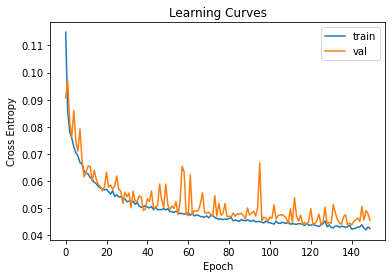

In [21]:
# plot learning curves
from matplotlib import pyplot as plt

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [21]:
# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')




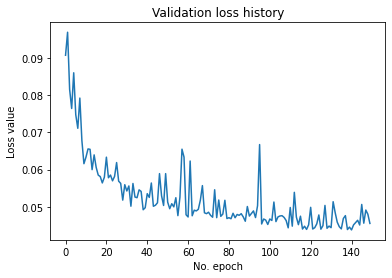

In [22]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()


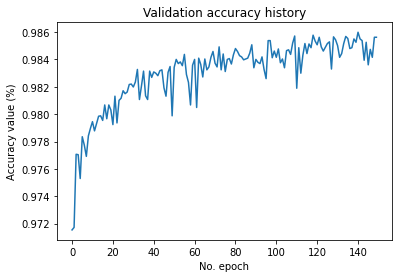

In [23]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

for k fold code


In [24]:
from sklearn.model_selection import KFold
import numpy as np

In [26]:
num_folds = 10

In [25]:
# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

In [29]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [31]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [32]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
  # Define the model architecture
    model = Sequential()
    model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    #model.add(BatchNormalization())
    model.add(Dense(10, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dense(10, activation='relu'))
    #model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    #model.add(BatchNormalization())


    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss="binary_crossentropy",
                optimizer=adm,
                metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss', patience=10)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=16,
              epochs=60,
              verbose=0,callbacks = [es])
    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.04427678510546684; accuracy of 98.44703674316406%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.053609080612659454; accuracy of 98.28546047210693%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.0542120598256588; accuracy of 98.35727214813232%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.04689115658402443; accuracy of 98.50987195968628%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.05488476902246475; accuracy of 98.11490178108215%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.

In [33]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.04427678510546684 - Accuracy: 98.44703674316406%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.053609080612659454 - Accuracy: 98.28546047210693%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.0542120598256588 - Accuracy: 98.35727214813232%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.04689115658402443 - Accuracy: 98.50987195968628%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.05488476902246475 - Accuracy: 98.11490178108215%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.04558015242218971 - Accuracy: 98.45601320266724%
------------------------------------------------------------------